## Imports

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf

## Data generation

In [4]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations, 1))
zs = np.random.uniform(-10, 10, (observations, 1))

generated_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1, 1, (observations, 1))
generated_targets = 2*xs -3*zs + 5 + noise 

np.savez('_tf_intro', inputs=generated_inputs, targets=generated_targets)

## Inputs & Outputs

In [12]:
input_size = 2
output_size = 1

inputs = tf.placeholder(tf.float32, [None, input_size])
targets = tf.placeholder(tf.float32, [None, output_size])

weights = tf.Variable(tf.random_uniform([input_size, output_size], minval=-0.1, maxval=0.1)) 
biases = tf.Variable(tf.random_uniform([output_size], maxval = 0.1))

outputs = tf.matmul(inputs, weights) + biases

## Mean, Optimize & Execution

In [13]:
mean_loss = tf.losses.mean_squared_error(labels=targets, predictions=outputs) / 2.

optimize = tf.train.GradientDescentOptimizer(learning_rate = 0.05).minimize(mean_loss)

In [15]:
sess = tf.InteractiveSession()
initializer = tf.global_variables_initializer()
sess.run(initializer)

c:\python38\lib\site-packages\tensorflow\python\client\session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


## Data

In [16]:
training_data = np.load('_tf_intro.npz')

In [17]:
for e in range(100):
    _, curr_loss = sess.run([optimize, mean_loss], 
                            feed_dict= {inputs:training_data['inputs'], targets:training_data['targets']})
    print(curr_loss)

251.25931
146.41861
86.86294
52.753883
33.06068
21.574574
14.779229
10.676471
8.128301
6.485373
5.376291
4.5879335
3.9973917
3.5332406
3.1534922
2.833038
2.5564942
2.3141162
2.0994668
1.9080706
1.7366577
1.582707
1.4441898
1.3194182
1.2069448
1.1055132
1.0140117
0.93145376
0.85695654
0.7897278
0.7290559
0.67430013
0.6248821
0.5802809
0.5400273
0.503697
0.47090808
0.44131446
0.4146047
0.39049816
0.36874157
0.34910497
0.33138207
0.31538665
0.30095005
0.28792062
0.27616078
0.26554722
0.25596786
0.24732226
0.23951922
0.2324765
0.22612043
0.22038367
0.21520616
0.21053323
0.20631553
0.20250915
0.19907354
0.19597282
0.19317426
0.19064853
0.18836899
0.18631151
0.18445459
0.18277866
0.18126602
0.17990085
0.17866871
0.1775566
0.17655298
0.17564708
0.17482948
0.17409162
0.17342563
0.17282458
0.17228206
0.17179249
0.17135058
0.17095174
0.1705918
0.17026691
0.1699737
0.16970901
0.16947013
0.16925457
0.16906
0.16888441
0.16872592
0.16858292
0.1684538
0.16833729
0.1682321
0.16813715
0.16805151
0.1679

## Plot data

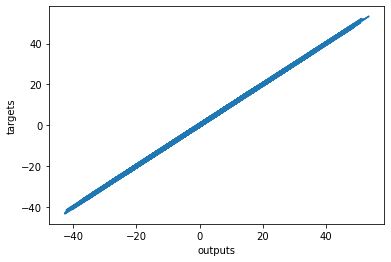

In [20]:
_output = sess.run([outputs], feed_dict={inputs: training_data['inputs']})

plt.plot(np.squeeze(_output), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()